<a href="https://colab.research.google.com/github/zine1919/Portfolio-Optimization/blob/main/credit_risk_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# load the data
loan_data = pd.read_csv('/content/drive/MyDrive/data/loan_data_2007_2014.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
#dropping irrelevant columns
columns_to_ = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                          'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
loan_data.drop(columns=columns_to_, inplace=True, axis=1)
# drop na values
loan_data.dropna(inplace=True)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   181686 non-null  int64  
 1   funded_amnt                 181686 non-null  int64  
 2   funded_amnt_inv             181686 non-null  float64
 3   term                        181686 non-null  int64  
 4   int_rate                    181686 non-null  float64
 5   installment                 181686 non-null  float64
 6   grade                       181686 non-null  object 
 7   emp_length                  181686 non-null  object 
 8   home_ownership              181686 non-null  object 
 9   annual_inc                  181686 non-null  float64
 10  verification_status         181686 non-null  object 
 11  issue_d                     181686 non-null  object 
 12  loan_status                 181686 non-null  object 
 13  pymnt_plan

In [ ]:
loan_data.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.999996,0.999992,0.419478,0.177538,0.950538,0.337708,0.018928,0.014195,-0.012577,-0.042768,0.164484,-0.082266,0.301161,0.129542,0.184956,0.545555,0.545533,0.731291,0.731352,0.732478,0.275365,-0.014728,0.006445,-0.003080,0.299252,0.215081
funded_amnt,0.999996,1.000000,0.999995,0.419473,0.177526,0.950542,0.337704,0.018923,0.014193,-0.012590,-0.042761,0.164475,-0.082267,0.301158,0.129539,0.184944,0.545567,0.545544,0.731298,0.731359,0.732477,0.275371,-0.014728,0.006446,-0.003080,0.299249,0.215081
funded_amnt_inv,0.999992,0.999995,1.000000,0.419535,0.177703,0.950534,0.337729,0.018928,0.014212,-0.012527,-0.042752,0.164494,-0.082250,0.301139,0.129550,0.184935,0.545710,0.545691,0.731168,0.731237,0.732473,0.275324,-0.014732,0.006435,-0.003079,0.299238,0.215066
term,0.419478,0.419473,0.419535,1.000000,0.462328,0.162843,0.058191,0.074361,0.001775,0.008288,-0.013033,0.057030,-0.024932,0.080647,0.084094,0.076679,0.462481,0.462479,0.153047,0.153104,0.529145,0.091027,-0.000585,0.009740,-0.002233,0.107284,0.043515
int_rate,0.177538,0.177526,0.177703,0.462328,1.000000,0.151286,-0.041277,0.132896,0.047264,0.238915,-0.042830,-0.016902,0.051425,-0.013859,0.224948,-0.038403,0.120785,0.120816,0.155967,0.156154,0.497445,0.085896,0.014704,0.035114,0.000021,-0.065960,-0.091219
installment,0.950538,0.950542,0.950534,0.162843,0.151286,1.000000,0.337168,0.011325,0.020783,0.015726,-0.046790,0.156625,-0.071903,0.291513,0.138470,0.169278,0.422301,0.422280,0.764232,0.764301,0.661083,0.279129,-0.013547,0.009233,-0.002557,0.272323,0.202502
annual_inc,0.337708,0.337704,0.337729,0.058191,-0.041277,0.337168,1.000000,-0.221698,0.049583,0.060377,-0.061775,0.108495,-0.001772,0.295483,0.054057,0.162823,0.161319,0.161331,0.269612,0.269653,0.198058,0.118165,-0.004302,0.017960,0.002107,0.440722,0.220790
dti,0.018928,0.018923,0.018928,0.074361,0.132896,0.011325,-0.221698,1.000000,0.000229,-0.006620,0.006759,0.269652,-0.063165,0.101815,0.148710,0.198952,0.070005,0.069989,-0.038089,-0.038081,0.066179,-0.055705,-0.005131,0.012731,-0.004470,-0.048852,0.041074
delinq_2yrs,0.014195,0.014193,0.014212,0.001775,0.047264,0.020783,0.049583,0.000229,1.000000,0.005740,-0.578305,0.059063,-0.048025,-0.004706,-0.013344,0.091488,0.032602,0.032597,-0.007942,-0.007924,0.025006,-0.017932,0.025296,0.114326,-0.003535,0.075872,-0.004426
inq_last_6mths,-0.012577,-0.012590,-0.012527,0.008288,0.238915,0.015726,0.060377,-0.006620,0.005740,1.000000,0.012798,0.101517,0.048377,-0.019030,-0.096997,0.135751,-0.064403,-0.064408,0.036208,0.036294,0.057998,0.049768,-0.002225,-0.013096,0.001772,0.051748,0.004712


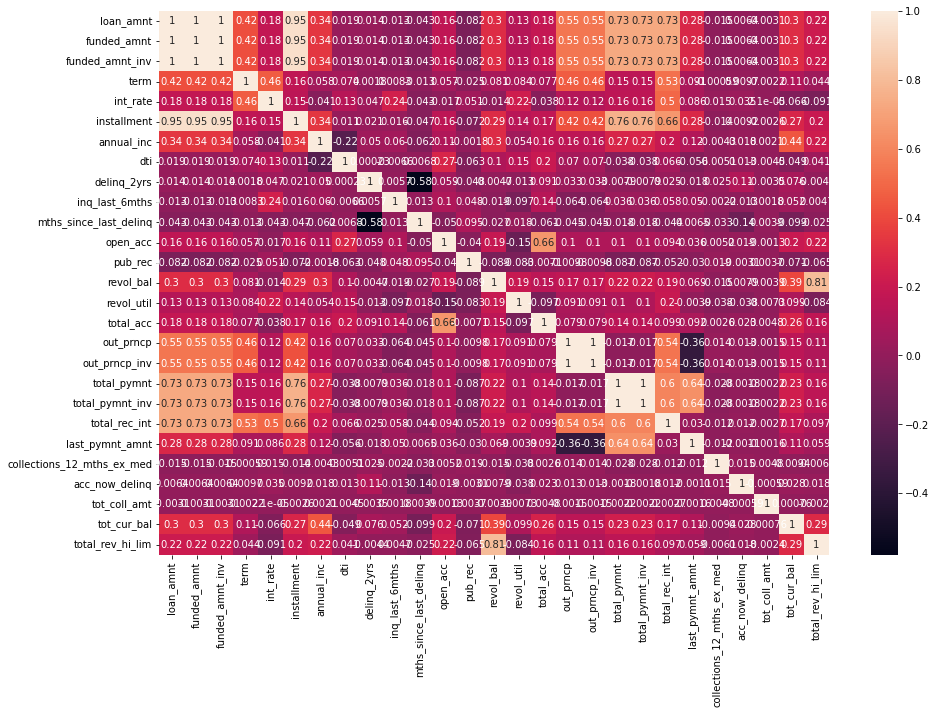

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(loan_data.corr(),annot=True)

In [ ]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv','installment','total_pymnt_inv','out_prncp_inv']
loan_data.drop(columns=columns,axis=1,inplace=True)

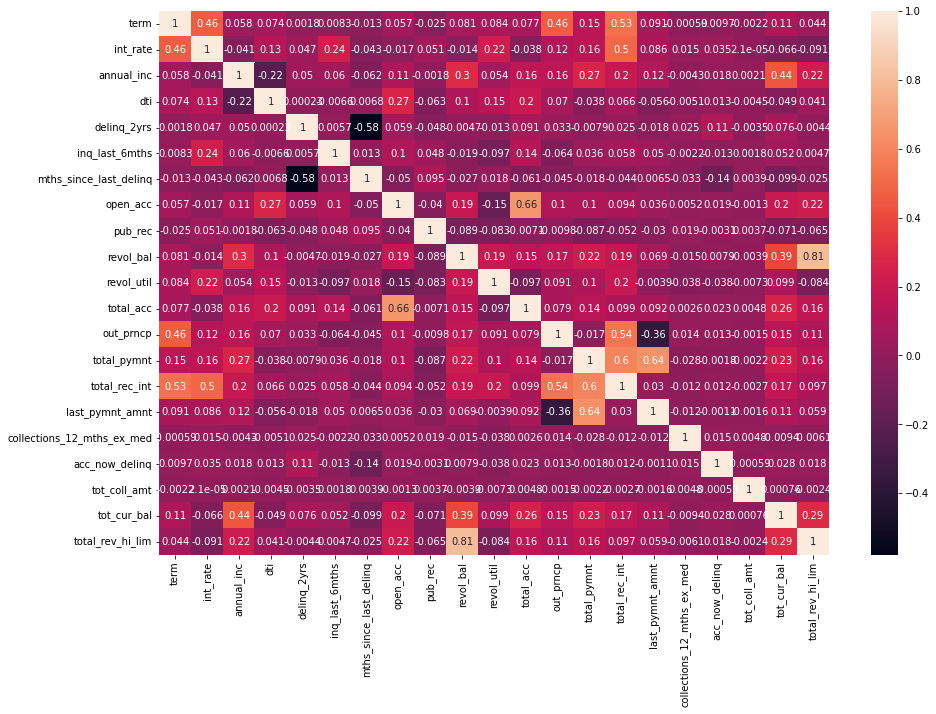

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(loan_data.corr(),annot=True)

In [ ]:
loan_data['term']

42537      36 months
42538      36 months
42539      36 months
42541      36 months
42543      36 months
             ...    
466277     36 months
466278     36 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 181686, dtype: object

In [ ]:
def Term_Numeric(data, col):
    data[col] = pd.to_numeric(data[col].str.replace(' months', ''))

Term_Numeric(loan_data, 'term')

def Emp_Length_Convert(data, col):
    data[col] = data[col].str.replace('\+ years', '')
    data[col] = data[col].str.replace('< 1 year', str(0))
    data[col] = data[col].str.replace(' years', '')
    data[col] = data[col].str.replace(' year', '')
    data[col] = pd.to_numeric(data[col])
    data[col].fillna(value = 0, inplace = True)

def Date_Columns(data, col):
    today_date = pd.to_datetime('2020-08-01')
    data[col] = pd.to_datetime(data[col], format = "%b-%y")
    data['mths_since_' + col] = round(pd.to_numeric((today_date - data[col]) / np.timedelta64(1, 'M')))
    data['mths_since_' + col] = data['mths_since_' + col].apply(lambda x: data['mths_since_' + col].max() if x < 0 else x)
    data.drop(columns = [col], inplace = True)

In [ ]:
Emp_Length_Convert(loan_data,'emp_length')

In [ ]:
Date_Columns(loan_data,'last_credit_pull_d')

In [ ]:
loan_data.head()

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_pymnt_d,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_credit_pull_d
42537,36,6.62,A,10,MORTGAGE,105000.0,Not Verified,Current,n,debt_consolidation,CT,14.05,0.0,1.0,43.0,12.0,0.0,13168,21.6,22.0,w,4266.62,8842.80,1109.42,368.45,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,55.0,80.0,317.0,55.0
42538,36,13.53,B,10,RENT,40000.0,Source Verified,Fully Paid,n,debt_consolidation,NM,16.94,0.0,0.0,53.0,7.0,2.0,5572,68.8,32.0,w,0.00,13359.77,1359.78,119.17,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,59.0,80.0,262.0,55.0
42539,36,8.90,A,2,MORTGAGE,63000.0,Not Verified,Current,n,debt_consolidation,FL,16.51,0.0,0.0,34.0,8.0,0.0,11431,74.2,29.0,w,5449.27,11431.20,1880.47,476.30,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,55.0,80.0,269.0,55.0
42541,36,12.85,B,4,RENT,88000.0,Not Verified,Current,n,debt_consolidation,NC,10.02,1.0,0.0,16.0,6.0,1.0,3686,81.9,14.0,f,5274.10,11296.94,2571.04,470.71,0.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,55.0,80.0,386.0,55.0
42543,36,9.67,B,7,MORTGAGE,102000.0,Not Verified,Current,n,debt_consolidation,MA,15.55,2.0,0.0,11.0,9.0,0.0,9912,44.4,22.0,f,3659.12,7706.81,1365.93,321.13,0.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,55.0,80.0,370.0,55.0


In [ ]:
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

In [ ]:
# creating a new column based on the loan_status
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
loan_data.drop(columns = ['loan_status'], inplace = True)

In [ ]:
loan_data.head()

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_pymnt_d,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_credit_pull_d,good_bad
42537,36,6.62,A,10,MORTGAGE,105000.0,Not Verified,n,debt_consolidation,CT,14.05,0.0,1.0,43.0,12.0,0.0,13168,21.6,22.0,w,4266.62,8842.80,1109.42,368.45,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,55.0,80.0,317.0,55.0,1
42538,36,13.53,B,10,RENT,40000.0,Source Verified,n,debt_consolidation,NM,16.94,0.0,0.0,53.0,7.0,2.0,5572,68.8,32.0,w,0.00,13359.77,1359.78,119.17,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,59.0,80.0,262.0,55.0,1
42539,36,8.90,A,2,MORTGAGE,63000.0,Not Verified,n,debt_consolidation,FL,16.51,0.0,0.0,34.0,8.0,0.0,11431,74.2,29.0,w,5449.27,11431.20,1880.47,476.30,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,55.0,80.0,269.0,55.0,1
42541,36,12.85,B,4,RENT,88000.0,Not Verified,n,debt_consolidation,NC,10.02,1.0,0.0,16.0,6.0,1.0,3686,81.9,14.0,f,5274.10,11296.94,2571.04,470.71,0.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,55.0,80.0,386.0,55.0,1
42543,36,9.67,B,7,MORTGAGE,102000.0,Not Verified,n,debt_consolidation,MA,15.55,2.0,0.0,11.0,9.0,0.0,9912,44.4,22.0,f,3659.12,7706.81,1365.93,321.13,0.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,55.0,80.0,370.0,55.0,1


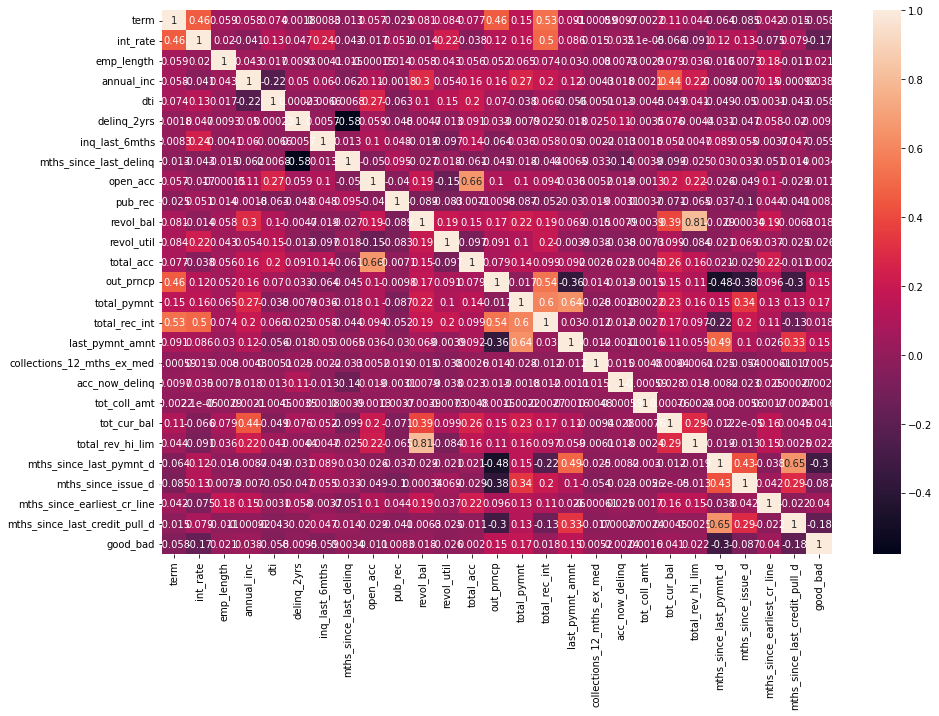

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(loan_data.corr(),annot=True)

In [ ]:
categorical_column

Index(['grade', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'initial_list_status', 'application_type'],
      dtype='object')

In [ ]:
categorical_column = loan_data.select_dtypes('object').columns
for i in range(len(categorical_column)):
  le = LabelEncoder()
  loan_data[categorical_column[i]] = le.fit_transform(loan_data[categorical_column[i]])

In [ ]:
loan_data.head()

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_pymnt_d,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_credit_pull_d,good_bad
42537,36,6.62,0,10,1,105000.0,0,0,2,6,14.05,0.0,1.0,43.0,12.0,0.0,13168,21.6,22.0,1,4266.62,8842.80,1109.42,368.45,0.0,0,0.0,0.0,267646.0,61100.0,55.0,80.0,317.0,55.0,1
42538,36,13.53,1,10,5,40000.0,1,0,2,28,16.94,0.0,0.0,53.0,7.0,2.0,5572,68.8,32.0,1,0.00,13359.77,1359.78,119.17,0.0,0,0.0,15386.0,13605.0,8100.0,59.0,80.0,262.0,55.0,1
42539,36,8.90,0,2,1,63000.0,0,0,2,9,16.51,0.0,0.0,34.0,8.0,0.0,11431,74.2,29.0,1,5449.27,11431.20,1880.47,476.30,0.0,0,0.0,1514.0,272492.0,15400.0,55.0,80.0,269.0,55.0,1
42541,36,12.85,1,4,5,88000.0,0,0,2,25,10.02,1.0,0.0,16.0,6.0,1.0,3686,81.9,14.0,0,5274.10,11296.94,2571.04,470.71,0.0,0,0.0,0.0,17672.0,4500.0,55.0,80.0,386.0,55.0,1
42543,36,9.67,1,7,1,102000.0,0,0,2,18,15.55,2.0,0.0,11.0,9.0,0.0,9912,44.4,22.0,0,3659.12,7706.81,1365.93,321.13,0.0,0,0.0,0.0,39143.0,22300.0,55.0,80.0,370.0,55.0,1


In [ ]:
x = loan_data.drop(['good_bad'],axis=1)
y = loan_data['good_bad']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# compare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))


results = []
names = []

for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.933590 (0.002028)
KNN: 0.904854 (0.002494)
DT: 0.982666 (0.001288)
NB: 0.512556 (0.067850)
RF: 0.990347 (0.000836)


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(x_train,y_train)

1.0

In [ ]:
model.score(x_test,y_test)

0.9824207348599829

In [ ]:
model.feature_importances_

array([4.24037408e-03, 5.84226893e-03, 1.84276464e-03, 1.23069281e-03,
       3.73800712e-04, 3.87759202e-03, 1.15305481e-03, 0.00000000e+00,
       1.56240318e-03, 2.53357532e-03, 4.86580618e-03, 1.26154944e-03,
       1.33821987e-03, 2.67119644e-03, 2.62268152e-03, 4.54073271e-04,
       4.22772909e-03, 3.93044143e-03, 2.52821084e-03, 4.14378414e-04,
       1.12783574e-02, 5.57406951e-02, 5.20909801e-02, 5.69615429e-01,
       2.98895592e-05, 0.00000000e+00, 5.09829221e-05, 1.38135084e-03,
       4.58562212e-03, 5.15005148e-03, 3.66323878e-03, 6.06694542e-02,
       1.87528612e-01, 1.24452320e-03])

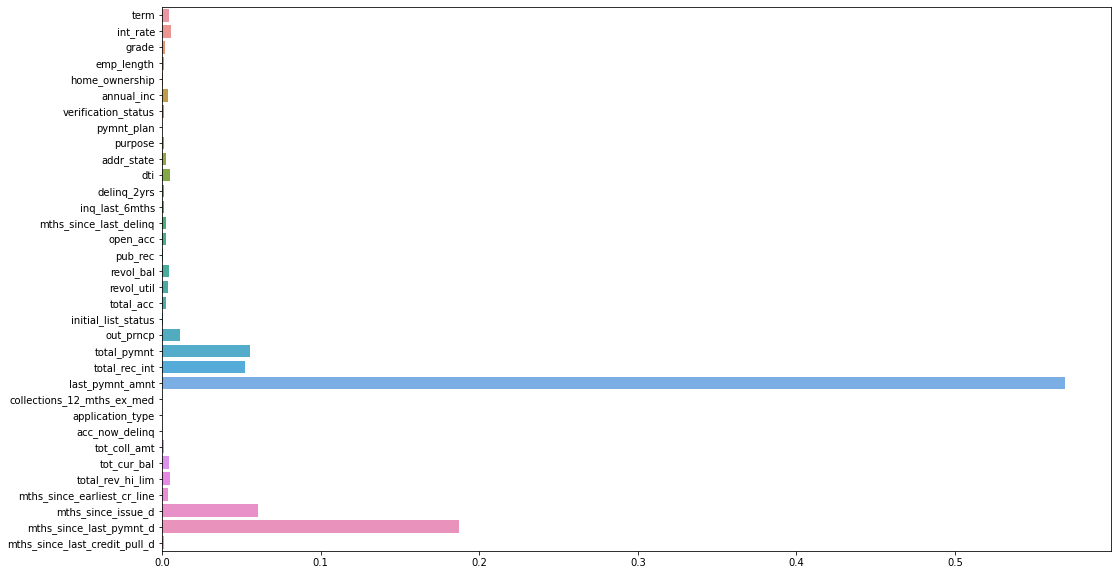

In [ ]:
plt.figure(figsize=(17,10))
sns.barplot(y=x.columns,x=model.feature_importances_)

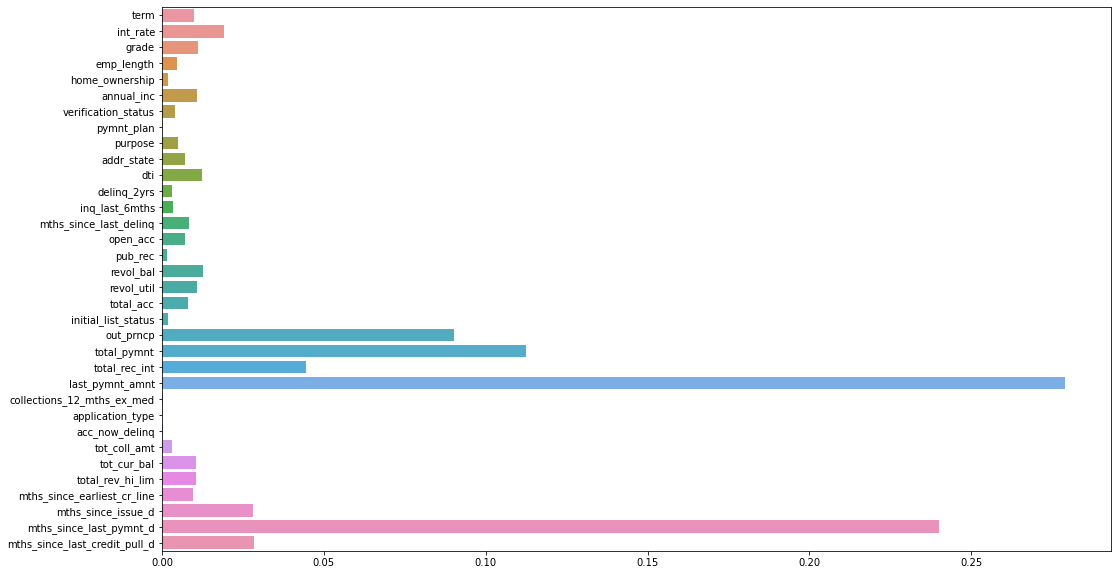

In [ ]:
plt.figure(figsize=(17,10))
sns.barplot(y=x.columns,x=model1.feature_importances_)

In [ ]:
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model1.score(x_test,y_test)

0.9328351985589672

In [ ]:
print(classification_report(y_test,model1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.34      0.50      5914
           1       0.93      1.00      0.96     54043

    accuracy                           0.93     59957
   macro avg       0.94      0.67      0.73     59957
weighted avg       0.93      0.93      0.92     59957

